In [1]:
using Catlab

# 1. The Graph Schema

### To use the visualization function define in Catlab.jl, we use the pre-built graph schema of "SchGraph" in Catlab.jl. The SchGraph schema is:

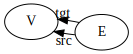

In [2]:
to_graphviz(SchGraph)

# Graphs have the built-in ACSet Graph, from which we will request the terminal object

In [3]:
const 𝒞 = ACSetCategory(CSetCat(Graph()))

ACSetCategory(CSetCat(Graph), Dict{Symbol, Type}(:Cat => ConcreteCategory, :ACSHom => ACSetTransformation, :Hom => FinFunction, :Op => Union{}, :Sym => Symbol, :AttrType => Union{}, :Ob => FinSetInt, :Attr => Union{}, :ACS => ACSet, :Hetero => ConcreteHeteroMorphism…))

# We explore two universal constructions -- the Terminal and initial object

In [4]:
T = terminal[𝒞]()

ACSetLimit(Multispan{Graph, ACSetTransformation, Any, Vector{ACSetTransformation}, Vector{Any}}(Graph:
  V = 1:1
  E = 1:1
  src : E → V = [1]
  tgt : E → V = [1], ACSetTransformation[], Any[]), (V = TerminalLimit{FinSetInt, FinFunction}(FinSet(1)), E = TerminalLimit{FinSetInt, FinFunction}(FinSet(1))), FreeDiagram(EmptyDiagram{ACSet, StaticArraysCore.SVector{0, ACSet}}(ACSet[]), Dict{Symbol, Type}(:Ob => ACSet, :FSet => FinSet, :Hom => Union{}, :V => Int64, :E => Int64)))

In [6]:
apex(T)

E,src,tgt
1,1,1


In [7]:
to_graphviz(apex(T))

In [8]:
I = initial[𝒞]()

ACSetColimit(Multicospan{Graph, ACSetTransformation, Any, Vector{ACSetTransformation}, Vector{Any}}(Graph:
  V = 1:0
  E = 1:0
  src : E → V = Int64[]
  tgt : E → V = Int64[], ACSetTransformation[], Any[]), (V = InitialColimit{FinSetInt, FinFunction}(FinSet(0)), E = InitialColimit{FinSetInt, FinFunction}(FinSet(0))), FreeDiagram(EmptyDiagram{ACSet, StaticArraysCore.SVector{0, ACSet}}(ACSet[]), Dict{Symbol, Type}(:Ob => ACSet, :FSet => FinSet, :Hom => Union{}, :V => Int64, :E => Int64)))

In [9]:
to_graphviz(apex(I))

# 2. Define Graph instances

## Now we define a graph with two vertices, and a single edge betweenst them

In [10]:
g_connectedPair = @acset Graph begin
    V = 2
    E = 1
    src = [1]
    tgt = [2]
end

E,src,tgt
1,1,2


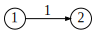

In [11]:
to_graphviz(g_connectedPair; node_labels=true, edge_labels=true)

In [12]:
## Now we define a graph with three vertices, and two edges end-to-end 

In [13]:
g_reciprocalPair = @acset Graph begin
    V = 2
    E = 2
    src = [1,2]
    tgt = [2,1]
end

E,src,tgt
1,1,2
2,2,1


In [14]:
to_graphviz(g_reciprocalPair)

In [15]:
g_connectedPairReflexiveEdges = @acset Graph begin
    V = 2
    E = 3
    src = [1,1,2]
    tgt = [2,1,2]
end

E,src,tgt
1,1,2
2,1,1
3,2,2


In [16]:
to_graphviz(g_connectedPairReflexiveEdges)

# Ok, now take the coproduct of several graphs

## ...of a reciprocal (but no self) loops (on the one hand) and the connected pair (on the other)

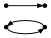

In [17]:
to_graphviz(apex(coproduct[𝒞](g_reciprocalPair, g_connectedPair)))

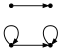

In [18]:
to_graphviz(apex(coproduct[𝒞](g_connectedPairReflexiveEdges, g_connectedPair)))

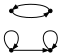

In [19]:
to_graphviz(apex(coproduct[𝒞](g_connectedPairReflexiveEdges, g_reciprocalPair)))

# Ok, now take the *product* of the same successive pairs of graphs

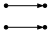

In [20]:
to_graphviz(apex(product[𝒞](g_reciprocalPair, g_connectedPair)))

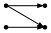

In [21]:
to_graphviz(apex(product[𝒞](g_connectedPairReflexiveEdges, g_connectedPair)))

In [22]:
to_graphviz(apex(product[𝒞](g_connectedPairReflexiveEdges, g_reciprocalPair)))

# The material below is for students interested in exploring more deeply, or upon request in the mini-course

In [23]:
g_endToEnd = @acset Graph begin
    V = 3
    E = 2
    src = [1, 2]
    tgt = [2, 3]
end

E,src,tgt
1,1,2
2,2,3


In [24]:
to_graphviz(g_endToEnd)

## Now we define a graph with two vertices, and a single edge betweenst them -- but also with reflexive loops on each of the 2 vertices

In [25]:
to_graphviz(g_connectedPairReflexiveEdges)

In [26]:
g_singleVertex = @acset Graph begin
    V = 1
    E = 0
    src = []
    tgt = []
end

Graph {V:1, E:0}

In [27]:
to_graphviz(g_singleVertex)

In [28]:
g_unit = @acset Graph begin
    V = 1
    E = 1
    src = [1]
    tgt = [1]
end

E,src,tgt
1,1,1


In [29]:
to_graphviz(g_unit)

In [30]:
to_graphviz(g_singleVertex)

In [31]:
homomorphisms(g_singleVertex, g_reciprocalPair)

2-element Vector{Any}:
 ACSetTransformation((V = FinFunction([1], FinSet(2)), E = FinFunction(Int64[], FinSet(2))), )
 ACSetTransformation((V = FinFunction([2], FinSet(2)), E = FinFunction(Int64[], FinSet(2))), )

In [32]:
to_graphviz(g_connectedPair)

In [33]:
homomorphisms(g_singleVertex, g_connectedPair)

2-element Vector{Any}:
 ACSetTransformation((V = FinFunction([1], FinSet(2)), E = FinFunction(Int64[], FinSet(1))), )
 ACSetTransformation((V = FinFunction([2], FinSet(2)), E = FinFunction(Int64[], FinSet(1))), )

# Ok, now take the *coproduct* of several graphs

## ...of a single vertex (on the one hand) and the connected pair (on the other)

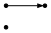

In [34]:
to_graphviz(apex(coproduct[𝒞](g_singleVertex, g_connectedPair)))

## ...of a reciprocal (but no self) loops (on the one hand) and the connected pair (on the other)

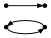

In [35]:
to_graphviz(apex(coproduct[𝒞](g_reciprocalPair, g_connectedPair)))

# Ok, now take the *product* of several graphs

## ...of two single vertices

In [36]:
to_graphviz(apex(product[𝒞](g_singleVertex, g_singleVertex)))

## ...of a single vertex (on the one hand) and the connected pair (on the other)

In [37]:
to_graphviz(apex(product[𝒞](g_singleVertex, g_connectedPair)))

## ...of two connected pairs

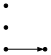

In [38]:
to_graphviz(apex(product[𝒞](g_connectedPair, g_connectedPair)))

## ...of two reciprocal loops

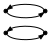

In [39]:
to_graphviz(apex(product[𝒞](g_reciprocalPair, g_reciprocalPair)))

## ...of a reciprocal (but no self) loops (on the one hand) and the connected pair (on the other)

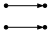

In [40]:
to_graphviz(apex(product[𝒞](g_reciprocalPair, g_connectedPair)))

## ...of a reciprocal (but no self) loops (on the one hand) and the an end-to-end pair of arrows (on the other)

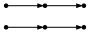

In [41]:
to_graphviz(apex(product[𝒞](g_reciprocalPair, g_endToEnd)))

# We will now explore the impact of reflexive loops on the above

## Now we define a graph with two vertices, and a single edge betweenst them -- but also with reflexive loops on each of the 2 vertices

In [42]:
to_graphviz(g_connectedPairReflexiveEdges)

## Now take the product of two of these edges between vertices and reciprocal loops 

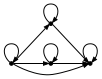

In [43]:
to_graphviz(apex(product[𝒞](g_connectedPairReflexiveEdges, g_connectedPairReflexiveEdges)))

## Now we define a graph with three vertices, and two edges end-to-end --- but with reflexive loops on all 3 vertices 

In [44]:
g_endToEndWithReflexiveEdges = @acset Graph begin
    V = 3
    E = 5
    src = [1, 2, 1, 2, 3]
    tgt = [2, 3, 1, 2, 3]
end

E,src,tgt
1,1,2
2,2,3
3,1,1
4,2,2
5,3,3


In [45]:
to_graphviz(g_endToEndWithReflexiveEdges)

## Now take the product of the end-to-end pair of arrows with reciprocal loops and itself

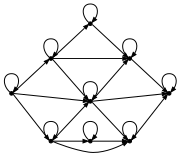

In [46]:
to_graphviz(apex(product[𝒞](g_endToEndWithReflexiveEdges, g_endToEndWithReflexiveEdges)))

In [47]:
g_reciprocalPairWithSelfLoops = @acset Graph begin
    V = 2
    E = 4
    src = [1,2,1,2]
    tgt = [2,1,1,2]
end

E,src,tgt
1,1,2
2,2,1
3,1,1
4,2,2


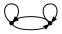

In [48]:
to_graphviz(g_reciprocalPairWithSelfLoops)

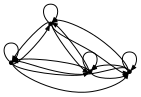

In [49]:
to_graphviz(apex(product[𝒞](g_reciprocalPairWithSelfLoops,g_reciprocalPairWithSelfLoops)))

In [50]:
g_discretePairWithSelfLoops = @acset Graph begin
    V = 2
    E = 2
    src = [1,2]
    tgt = [1,2]
end

E,src,tgt
1,1,1
2,2,2


## Now with multiplication by an arrow with reciprocal loops on both ends, rather than a discrete pair with reciprocal loops.  As a result, we can have directed connections going one direction between the two duplicates of "g_reciprocalPairWithSelfLoops"

In [51]:
g_connectedPairWithSelfLoops = @acset Graph begin
    V = 2
    E = 3
    src = [1,2,1]
    tgt = [1,2,2]
end

E,src,tgt
1,1,1
2,2,2
3,1,2


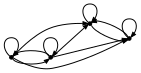

In [53]:
to_graphviz(apex(product[𝒞](g_connectedPairWithSelfLoops,g_reciprocalPairWithSelfLoops)))

## Now with multiplication by an arrow with a reciprocal loop on the proximal end only, rather than a discrete pair with reciprocal loops.  The result is that no connections are allowed within the distal side.

In [54]:
g_connectedPairWithProximalSelfLoop = @acset Graph begin
    V = 2
    E = 2
    src = [1,1]
    tgt = [1,2]
end

E,src,tgt
1,1,1
2,1,2


## Now with multiplication by an arrow with a reciprocal loop on the distal end only.  The result is that no connections are allowed within the proximal side.

In [55]:
g_connectedPairWithDistalSelfLoop = @acset Graph begin
    V = 2
    E = 2
    src = [1,2]
    tgt = [2,2]
end

E,src,tgt
1,1,2
2,2,2
